# Fatima Fellowship Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. These coding challenges are not meant to take too long, do NOT spend more than 4-6 hours on them -- you can submit whatever you have.

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook along with your application. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw)



---


### **Important**: Beore you get started, please make sure to make a **copy of this notebook** and set sharing permissions so that **anyone with the link can view**. Otherwise, we will NOT be able to assess your application.



---



# 1. Deep Learning for Vision

**Generated by AI detector**: Train a model to detect if images are generated by AI

* Find a dataset of natural images and images generated by AI (here is one such dataset on the [Hugging Face Hub](https://huggingface.co/datasets/competitions/aiornot) but you're welcome to use any dataset you've found.
* Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify the image as being generated by an AI or not until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE
print('Hi')

Hi


**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/datasets/sadikaljarif/fake-news-detection-dataset-english (if you'd like, you can also look at fake news datasets in other languages, which are available on the Huggingface Hub)
* Develop an NLP model for classification that uses a pretrained language model and the *text* of the article. It should *NOT* use the URL
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [ ]:
#installing libraries
!pip install opendatasets
!pip install pandas
!pip install -q kaggle
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.8 MB/s eta 0:00:00


In [ ]:
#Importing libraries
import opendatasets as od
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, TFBertModel
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [ ]:
#loading the datasets
fake_news=pd.read_csv("/Fake.csv")
true_news=pd.read_csv("/content/True.csv")

In [ ]:
#Exploring the datasets
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#Exploring the datasets
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


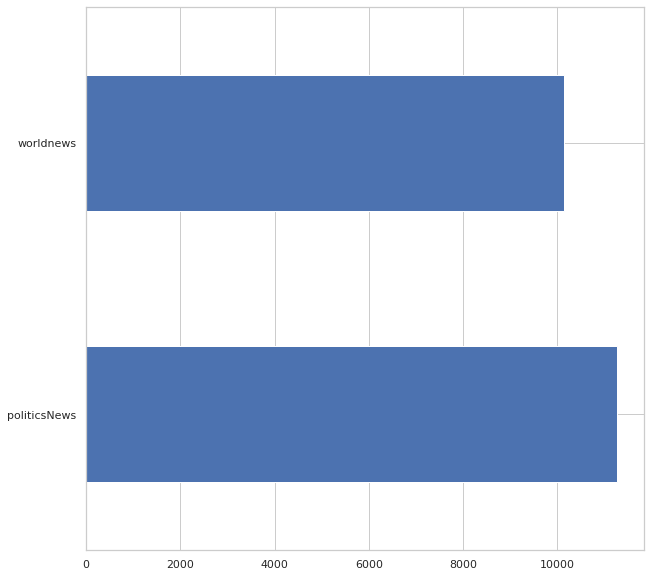

In [ ]:
#Subject Vs frequency bar graph
true_news['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 7,10

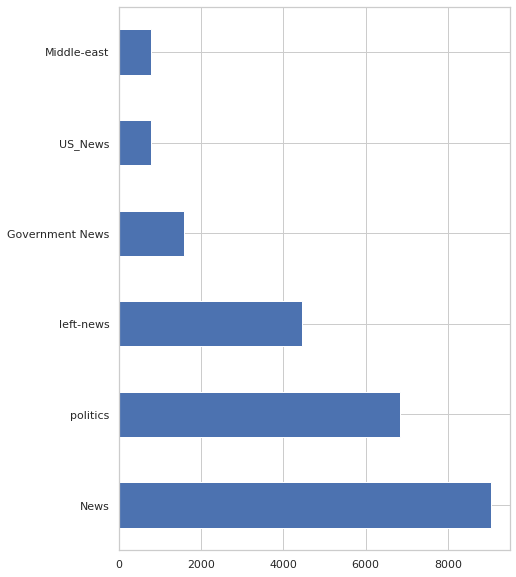

In [ ]:
#Subject Vs frequency bar graph
fake_news['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 10,7

In [ ]:
# Assigning label to the datasets
fake_news["label"]="fake"
true_news["label"]="true"

# Merging the real and true news datasets to create the final one
final_news_dataset= pd.concat([fake_news,true_news])

#Shuffling
final_news_dataset = final_news_dataset.sample(frac=1).reset_index(drop=True)

# Exploring the final dataset
final_news_dataset.head(10)



,title,text,subject,date,label
0,U.S. responds in court fight over illegal Indo...,BOSTON (Reuters) - U.S. immigration officials ...,politicsNews,"December 21, 2017",true
1,"Numbskull Republican Ignores History, Says Re...",Republican Rep. Ted Poe (R-Texas) spoke with F...,News,"January 20, 2016",fake
2,US-UK DIRTY WAR: ‘Latin American-style’ Death ...,Patrick Henningsen 21st Century WireThis week...,Middle-east,"July 14, 2016",fake
3,SUPREME COURT JUSTICE Goes All Creepy Predicti...,What the heck is wrong with these loony libera...,politics,"Jul 10, 2016",fake
4,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,US_News,"January 18, 2016",fake
5,Boiler Room EP #119 – Zombie Disneyland & The ...,Tune in to the Alternate Current Radio Network...,US_News,"July 29, 2017",fake
6,EU Parliament calls on Myanmar to free Reuters...,BRUSSELS (Reuters) - The president of the Euro...,worldnews,"December 14, 2017",true
7,Donald Trump Releases Statement On Cruz Sex S...,With the sex scandal allegations piling up aga...,News,"March 25, 2016",fake
8,McConnell Just ADMITTED The NRA Must Approve ...,We could already make the assumption that Sena...,News,"July 6, 2016",fake
9,Putin says question of who hacked Democratic p...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"December 23, 2016",true


In [ ]:
final_news_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
# Reducing additional features
final_news_dataset.drop(["subject","date"], axis=1)

# Exploring labelwise value counts
final_news_dataset.label.value_counts()

#viewing the processed data
sns.set_theme(style="whitegrid")
sns.countplot(x=final_news_dataset["label"])

fake    23481
true    21417
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

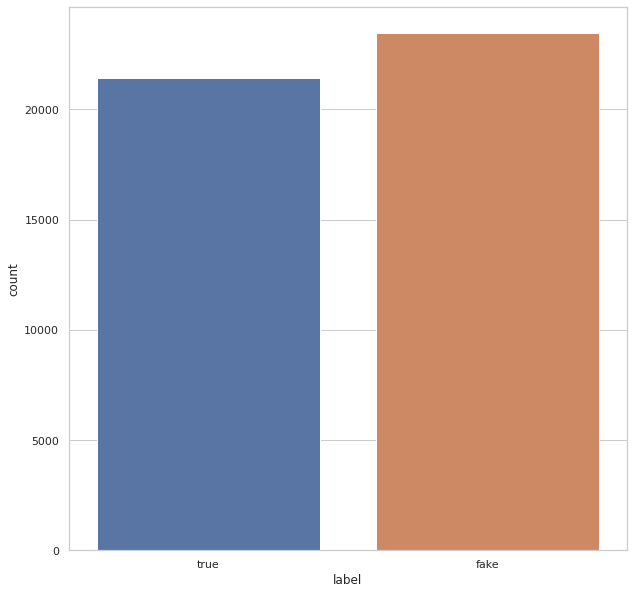

In [ ]:
# Minimizing the features
final_news_dataset["text"]=final_news_dataset["title"]+final_news_dataset["text"]
dataset=final_news_dataset[["text","label"]]

# Maping the labels into 0s and 1s
dataset['label'] = final_news_dataset['label'].map({'true':1, 'fake':0})

<ipython-input-59-72ed2ab62922>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label'] = final_news_dataset['label'].map({'true':1, 'fake':0})


In [ ]:
# storing the features 
max_len=100
text=dataset["text"]
label=dataset["label"]

In [ ]:

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
text_train, text_test, label_train, label_test = train_test_split(text, label, stratify = label, test_size = 0.2, random_state = 50)

In [ ]:
import transformers

def tokenize_text(input_text):
    # Initialize a BERT tokenizer with the pretrained model
    tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Tokenize the input text
    tokenized_text = tokenizer.batch_encode_plus(
        input_text,
        max_length=100,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_token_type_ids=False,
        verbose=True
    )
    
    # Return the tokenized text
    return tokenized_text

In [ ]:
data_train_token = tokenize_text(text_train)
data_test_token = tokenize_text(text_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import transformers

def create_model(maxlen):
    # Load the BERT model and tokenizer
    bert_model = transformers.TFBertModel.from_pretrained('bert-base-uncased')
    bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Define input layers for BERT inputs
    input_ids = Input(shape=(maxlen,), dtype=tf.int32)
    input_mask = Input(shape=(maxlen,), dtype=tf.int32)
    
    # Use the BERT model to encode the input text
    bert_layer = bert_model([input_ids, input_mask])[1]
    
    # Apply dropout regularization
    x = Dropout(0.5)(bert_layer)
    
    # Add a fully connected layer with activation function tanh
    x = Dense(64, activation='tanh')(x)
    
    # Apply dropout regularization again
    x = Dropout(0.2)(x)
    
    # Add a final output layer with sigmoid activation function
    x = Dense(1, activation='sigmoid')(x)
    
    # Define the model with inputs and outputs
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    
    # Return the model
    return model

In [ ]:
# Checking out the model

model=create_model(100)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                         

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set up the optimizer with specific parameters
optimizer = tf.keras.optimizers.legacy.Adam(
    learning_rate=1e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)


# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Set up an early stopping callback with specific parameters
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='max',
    verbose=1,
    patience=50,
    baseline=0.4,
    min_delta=0.0001,
    restore_best_weights=False
)


In [ ]:
history = model.fit(x = {'input_1':data_train_token['input_ids'],'input_2':data_train_token['attention_mask']}, y = label_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

In [ ]:
# make predictions on the test data
test_pred = model.predict(text_test)

# calculate AUC score on the test data
auc_score = roc_auc_score(label_test, test_pred)

# plot ROC curve
fpr, tpr, _ = roc_curve(label_test, test_pred)
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:

# # Evaluate the model and generate an AUC curve
# # model.eval()
# y_true = []
# y_pred = []
# with torch.no_grad():
#     for batch in test_dataloader:
#         input_ids, attention_mask, labels = batch
#         outputs = model(input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         probs = torch.softmax(logits, dim=1)[:, 1]
#         y_true.extend(labels.numpy())
#         y_pred.extend(probs.numpy())
# auc = roc_auc_score(y_true, y_pred)
# print(f'AUC: {auc}')


In [ ]:
testcase = "New York City is set to reopen its public schools for in-person learning in the fall with no remote option for students, Mayor Bill de Blasio announced on Monday, making it the largest school district in the country to offer no virtual learning. The announcement came as the city has achieved its goal of vaccinating at least one million residents against Covid-19 and as public health officials have said that it is safe for schools to fully reopen."

In [ ]:
test_token = tokenize_text(testcase)

In [ ]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

In [ ]:
if(test_text_pred[0]==0): print("Fake news")
else: print("True News")

Fake news


**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* (Optional) link to the model on Hugging Face Hub: 
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.

[Please put your write up here]

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA

[Please put your write up here]

In [ ]:
### WRITE YOUR CODE HERE

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [ ]:
### WRITE YOUR CODE HERE

**Write up**: What surprising discoveries do you see?

[Please put your write up here]